In [1]:
# First, import the relevant modules
import requests
import json

In [2]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
r= requests.get('https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.json?api_key=Lq43ztbiWJ73CJUDPiye&start_date=2016-01-01&end_date=2020-2-29')
print(r.status_code)

200


In [3]:
dict = r.json()

In [4]:
#explore the structure of the dictionary
for key, value in dict.items() :
    print (key)

dataset


In [5]:
print(dict['dataset'])

{'id': 7692468, 'dataset_code': 'MKPRU', 'database_code': 'BCHAIN', 'name': 'Bitcoin Market Price USD', 'description': 'Data showing the USD market price from Mt.gox', 'refreshed_at': '2020-05-22T23:00:32.212Z', 'newest_available_date': '2020-05-23', 'oldest_available_date': '2009-01-03', 'column_names': ['Date', 'Value'], 'frequency': 'daily', 'type': 'Time Series', 'premium': False, 'limit': None, 'transform': None, 'column_index': None, 'start_date': '2016-01-01', 'end_date': '2020-02-29', 'data': [['2020-02-29', 8804.72], ['2020-02-28', 8785.52], ['2020-02-27', 9309.15], ['2020-02-26', 9663.75], ['2020-02-25', 9989.39], ['2020-02-24', 9669.63], ['2020-02-23', 9696.58], ['2020-02-22', 9606.86], ['2020-02-21', 9604.72], ['2020-02-20', 10180.65], ['2020-02-19', 9703.93], ['2020-02-18', 9937.67], ['2020-02-17', 9904.17], ['2020-02-16', 10368.53], ['2020-02-15', 10242.43], ['2020-02-14', 10354.3], ['2020-02-13', 10275.38], ['2020-02-12', 9854.79], ['2020-02-11', 10162.41], ['2020-02-10'

In [6]:
# To make this clearer, let's iterate over the nested elements in the main dictionary

for key, value in dict['dataset'].items():
    print (key, value)

id 7692468
dataset_code MKPRU
database_code BCHAIN
name Bitcoin Market Price USD
description Data showing the USD market price from Mt.gox
refreshed_at 2020-05-22T23:00:32.212Z
newest_available_date 2020-05-23
oldest_available_date 2009-01-03
column_names ['Date', 'Value']
frequency daily
type Time Series
premium False
limit None
transform None
column_index None
start_date 2016-01-01
end_date 2020-02-29
data [['2020-02-29', 8804.72], ['2020-02-28', 8785.52], ['2020-02-27', 9309.15], ['2020-02-26', 9663.75], ['2020-02-25', 9989.39], ['2020-02-24', 9669.63], ['2020-02-23', 9696.58], ['2020-02-22', 9606.86], ['2020-02-21', 9604.72], ['2020-02-20', 10180.65], ['2020-02-19', 9703.93], ['2020-02-18', 9937.67], ['2020-02-17', 9904.17], ['2020-02-16', 10368.53], ['2020-02-15', 10242.43], ['2020-02-14', 10354.3], ['2020-02-13', 10275.38], ['2020-02-12', 9854.79], ['2020-02-11', 10162.41], ['2020-02-10', 9907.12], ['2020-02-09', 9807.54], ['2020-02-08', 9755.66], ['2020-02-07', 9614.9], ['2020-0

## Calculate what the highest and lowest opening prices were for the stock in this period.

In [7]:
p = dict['dataset']['data']
z= [x[1] for x in p]
res=[]
for val in z:
    if val!= None:
        res.append(val)
print("The maximum opening value in 2016 & 2020 was " +  str(max(res)))
print("The minimum opening value in 2016 & 2020 was " +  str(min(res)))

The maximum opening value in 2016 & 2020 was 19498.6833333
The minimum opening value in 2016 & 2020 was 368.38


In [8]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
url = 'https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.csv?api_key=Lq43ztbiWJ73CJUDPiye&start_date=2016-01-01&end_date=2020-4-29'

In [10]:
df= pd.read_csv( url ,index_col = None)
df.head()

,Date,Value
0,2020-04-29,7790.66
1,2020-04-28,7699.27
2,2020-04-27,7549.52
3,2020-04-26,7507.08
4,2020-04-25,7477.60


In [11]:
df.columns

Index(['Date', 'Value'], dtype='object')

In [12]:
df.dtypes

Date      object
Value    float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1581 non-null   object 
 1   Value   1581 non-null   float64
dtypes: float64(1), object(1)
memory usage: 24.8+ KB


In [14]:
df.columns.unique()

Index(['Date', 'Value'], dtype='object')

In [15]:
df.nunique(dropna = False)

Date     1581
Value    1574
dtype: int64

In [16]:
df.describe()

,Value
count,1581.000000
mean,5101.578212
std,3891.571269
min,368.380000
25%,964.706075
50%,5028.770000
75%,8025.257500
max,19498.683333


In [17]:
df.sample(5)

,Date,Value
576,2018-10-01,6593.135000
1015,2017-07-19,2320.122250
1457,2016-05-03,443.900000
1339,2016-08-29,576.530000
812,2018-02-07,7685.633333


In [18]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date     0
Value    0
dtype: int64

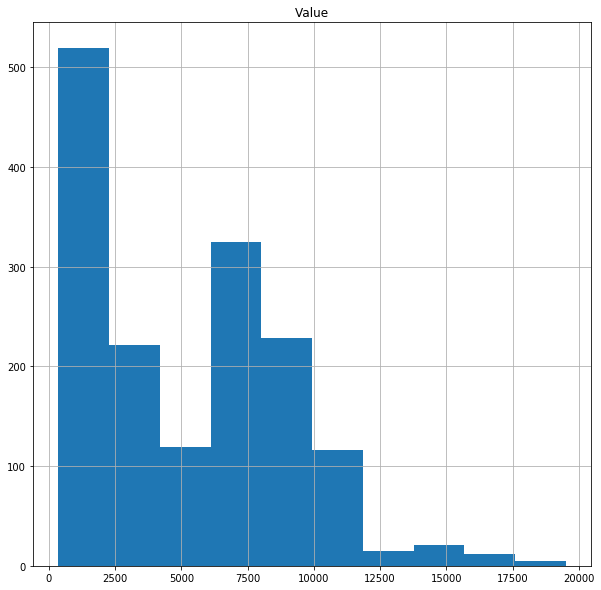

In [19]:
#histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

## Sorting the Price on Date

In [20]:
df = df.sort_values(by='Date')
df

,Date,Value
1580,2016-01-01,429.34
1579,2016-01-02,432.33
1578,2016-01-03,433.94
1577,2016-01-04,428.13
1576,2016-01-05,433.00
...,...,...
4,2020-04-25,7477.60
3,2020-04-26,7507.08
2,2020-04-27,7549.52
1,2020-04-28,7699.27


In [21]:
df = df.set_index('Date')

In [22]:
df.Value.dropna(0)

Date
2016-01-01     429.34
2016-01-02     432.33
2016-01-03     433.94
2016-01-04     428.13
2016-01-05     433.00
               ...   
2020-04-25    7477.60
2020-04-26    7507.08
2020-04-27    7549.52
2020-04-28    7699.27
2020-04-29    7790.66
Name: Value, Length: 1581, dtype: float64

## Inorder to Predict Price increase are decrease 
i created avariable 'pred' to compare the prices of today and previous day

In [23]:
df['pred'] = df.Value.shift(-1)

In [24]:
df.head()

,Value,pred
Date,,
2016-01-01,429.34,432.33
2016-01-02,432.33,433.94
2016-01-03,433.94,428.13
2016-01-04,428.13,433.00
2016-01-05,433.00,431.90


In [25]:
df.pred.dropna()

Date
2016-01-01     432.33
2016-01-02     433.94
2016-01-03     428.13
2016-01-04     433.00
2016-01-05     431.90
               ...   
2020-04-24    7477.60
2020-04-25    7507.08
2020-04-26    7549.52
2020-04-27    7699.27
2020-04-28    7790.66
Name: pred, Length: 1580, dtype: float64

In [26]:
df.isna()

,Value,pred
Date,,
2016-01-01,False,False
2016-01-02,False,False
2016-01-03,False,False
2016-01-04,False,False
2016-01-05,False,False
...,...,...
2020-04-25,False,False
2020-04-26,False,False
2020-04-27,False,False


In [27]:
df = df.drop('2020-04-29', axis=0)

In [28]:
df.isna()

,Value,pred
Date,,
2016-01-01,False,False
2016-01-02,False,False
2016-01-03,False,False
2016-01-04,False,False
2016-01-05,False,False
...,...,...
2020-04-24,False,False
2020-04-25,False,False
2020-04-26,False,False


## Predict variable (desired target):
target - has the price increase or decreased in next day? (binary: '1','0')

In [29]:
df['target']  = np.where(df.Value > df.pred ,'0','1')

In [30]:
df.head()

,Value,pred,target
Date,,,
2016-01-01,429.34,432.33,1
2016-01-02,432.33,433.94,1
2016-01-03,433.94,428.13,0
2016-01-04,428.13,433.00,1
2016-01-05,433.00,431.90,0


## Data Exploration

In [31]:
df['target'].value_counts()

1    876
0    704
Name: target, dtype: int64

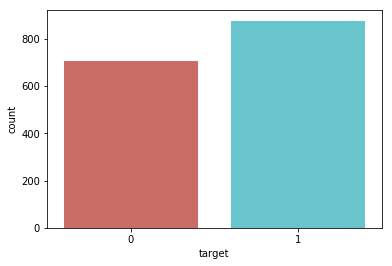

In [32]:
sns.countplot(x='target',data=df, palette='hls')
plt.show()
#plt.savefig('count_plot')

In [33]:
df.groupby('target').mean()

,Value,pred
target,,
0,5479.939707,5311.254640
1,4794.437145,4938.404733


In [34]:
df.groupby('Value').mean()

,pred
Value,
368.380000,385.060000
370.400000,385.450000
372.000000,373.480000
372.610000,378.980000
373.040000,373.740000
...,...
17737.111667,16026.271667
17771.900000,19498.683333
18961.856667,17737.111667


In [35]:
df.groupby('pred').mean()

,Value
pred,
368.380000,373.480000
370.400000,391.620000
372.000000,376.860000
372.610000,375.800000
373.040000,386.490000
...,...
17737.111667,18961.856667
17771.900000,16678.892000
18961.856667,19289.785000


In [36]:
cols = ['pred']
X= df[cols].values
y = df['target'].values

## Split Data (Testing, Training Data Sets)

In [37]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state = 0,shuffle = False ,stratify = None)

In [38]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1264, 1), (316, 1), (1264,), (316,))

## Logistic Regression Model Fitting

In [39]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics
acc=[]
roc=[]

clf=LogisticRegression()
clf.fit(train_X,train_y)

C:\Users\Avani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predicting the test set results and caculating the accuracy

In [40]:
y_pred=clf.predict(test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(test_X, test_y)))

Accuracy of logistic regression classifier on test set: 0.50


##  Cross Validation

In [41]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, train_X, train_y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.566


C:\Users\Avani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Avani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Avani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Avani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Avani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

## Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, y_pred)
print(confusion_matrix)

[[  0 159]
 [  0 157]]


## Accuracy

In [43]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(test_X, test_y)))

Accuracy of logistic regression classifier on test set: 0.50


## Compute precision, recall, F-measure and support

In [61]:
from sklearn.metrics import classification_matrix
print(classification_matrix(test_y, y_pred))

ImportError: cannot import name 'classification_matrix' from 'sklearn.metrics' (C:\Users\Avani\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

## kNN

In [47]:

from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

## Feature Engineering

In [48]:
df.reset_index(inplace = True)

In [49]:
df['newdate'] = df['Date']

In [50]:
df.head()

,Date,Value,pred,target,newdate
0,2016-01-01,429.34,432.33,1,2016-01-01
1,2016-01-02,432.33,433.94,1,2016-01-02
2,2016-01-03,433.94,428.13,0,2016-01-03
3,2016-01-04,428.13,433.00,1,2016-01-04
4,2016-01-05,433.00,431.90,0,2016-01-05


In [51]:
df.set_index('Date')

,Value,pred,target,newdate
Date,,,,
2016-01-01,429.34,432.33,1,2016-01-01
2016-01-02,432.33,433.94,1,2016-01-02
2016-01-03,433.94,428.13,0,2016-01-03
2016-01-04,428.13,433.00,1,2016-01-04
2016-01-05,433.00,431.90,0,2016-01-05
...,...,...,...,...
2020-04-24,7130.99,7477.60,1,2020-04-24
2020-04-25,7477.60,7507.08,1,2020-04-25
2020-04-26,7507.08,7549.52,1,2020-04-26


In [52]:
df['newdate'] =pd.to_datetime(df['newdate'])

In [53]:
import datetime as dt
df['weekday'] = df.newdate.dt.weekday

In [54]:
df['weekend'] = np.where(df['weekday']== 4 ,1,0)

In [55]:
df.head()

,Date,Value,pred,target,newdate,weekday,weekend
0,2016-01-01,429.34,432.33,1,2016-01-01,4,1
1,2016-01-02,432.33,433.94,1,2016-01-02,5,0
2,2016-01-03,433.94,428.13,0,2016-01-03,6,0
3,2016-01-04,428.13,433.00,1,2016-01-04,0,0
4,2016-01-05,433.00,431.90,0,2016-01-05,1,0


In [64]:
cols = ['pred','weekday','weekend']
X= df[cols].values
y = df['target'].values

In [65]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state = 0,shuffle = False ,stratify = None)

In [66]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics
acc=[]
roc=[]

clf=LogisticRegression()
clf.fit(train_X,train_y)

C:\Users\Avani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
y_pred=clf.predict_proba(test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(test_X, test_y)))
y_pred

Accuracy of logistic regression classifier on test set: 0.50


array([[0.45662785, 0.54337215],
       [0.45320905, 0.54679095],
       [0.45176933, 0.54823067],
       [0.46075256, 0.53924744],
       [0.4511249 , 0.5488751 ],
       [0.45078291, 0.54921709],
       [0.46541449, 0.53458551],
       [0.46395804, 0.53604196],
       [0.46487238, 0.53512762],
       [0.46760014, 0.53239986],
       [0.46770714, 0.53229286],
       [0.4605008 , 0.5394992 ],
       [0.45606946, 0.54393054],
       [0.4650811 , 0.5349189 ],
       [0.46205328, 0.53794672],
       [0.46070092, 0.53929908],
       [0.46348276, 0.53651724],
       [0.46782728, 0.53217272],
       [0.4543511 , 0.5456489 ],
       [0.45321949, 0.54678051],
       [0.46829368, 0.53170632],
       [0.46958815, 0.53041185],
       [0.46843735, 0.53156265],
       [0.46398269, 0.53601731],
       [0.46866363, 0.53133637],
       [0.45802765, 0.54197235],
       [0.45389914, 0.54610086],
       [0.46268956, 0.53731044],
       [0.46333281, 0.53666719],
       [0.45460062, 0.54539938],
       [0.

In [68]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [ ]:
mod